## This Jupyter notebook is used to illustrate the algorithm for Linear Regression problem

In [1]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

% matplotlib inline
% matplotlib notebook

### 1. Prepare Data

For this section, I will not use the already existed dataset, such as UCI. Instead, I will use numpy to generate random points

In [2]:
x = np.linspace(0, 10, 100)

mu=0.0;
sigma=3.0

delta = np.random.normal(mu, sigma, x.size)
y = 2*x + 3 + delta

<IPython.core.display.Javascript object>


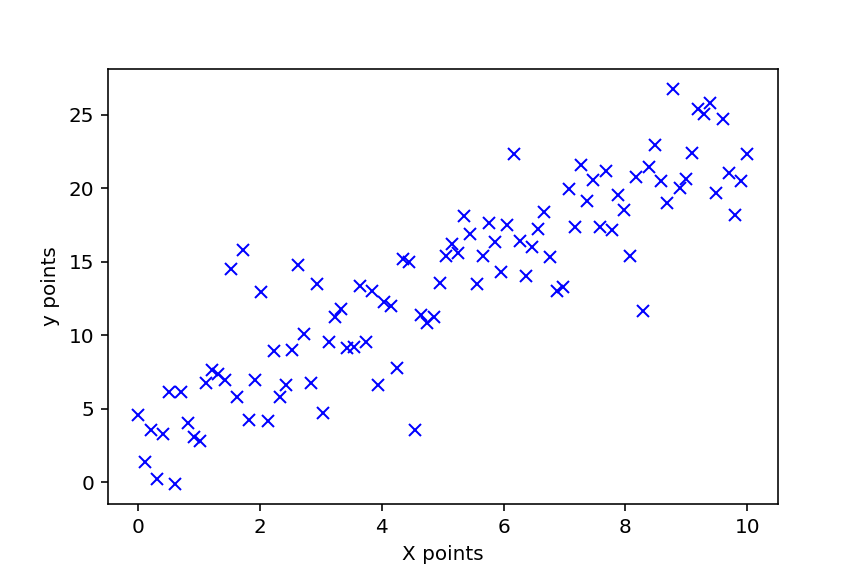

[]

In [3]:
fig,ax=plt.subplots(1,1)

ax.plot(x,y,'bx')
ax.set_xlabel('X points')
ax.set_ylabel('y points')

plt.plot()

### 2.  Initialize the problem

In [9]:
import pandas as pd

In [10]:
## Reshape the array so that we can build the data frame
x.reshape((1,len(x)))

array([[  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
          0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
          0.80808081,   0.90909091,   1.01010101,   1.11111111,
          1.21212121,   1.31313131,   1.41414141,   1.51515152,
          1.61616162,   1.71717172,   1.81818182,   1.91919192,
          2.02020202,   2.12121212,   2.22222222,   2.32323232,
          2.42424242,   2.52525253,   2.62626263,   2.72727273,
          2.82828283,   2.92929293,   3.03030303,   3.13131313,
          3.23232323,   3.33333333,   3.43434343,   3.53535354,
          3.63636364,   3.73737374,   3.83838384,   3.93939394,
          4.04040404,   4.14141414,   4.24242424,   4.34343434,
          4.44444444,   4.54545455,   4.64646465,   4.74747475,
          4.84848485,   4.94949495,   5.05050505,   5.15151515,
          5.25252525,   5.35353535,   5.45454545,   5.55555556,
          5.65656566,   5.75757576,   5.85858586,   5.95959596,
          6.06060606,   6.16161616,   6.

In [11]:
## in order to take the bias term into account, we use pandas
x_df=pd.DataFrame(x.T,index=np.arange(1,101),columns=['x'])

x_df.head()

,x
1,0.00000
2,0.10101
3,0.20202
4,0.30303
5,0.40404


In [12]:
## Add bias term

x_df['x0']=1

x_df.head()

,x,x0
1,0.00000,1
2,0.10101,1
3,0.20202,1
4,0.30303,1
5,0.40404,1


In [13]:
x_train=x_df.values


### 3. Gradient descent

In [14]:
def gradient_descent(x,y,theta,alpha,iteration=2000):
    iter_num=0;
    
    while iter_num<=iteration:
        gradient_sum_squares = 0
        for i in range(len(theta)):
            derivative=np.sum(np.dot(y-x.dot(theta),x[:,i]))
            theta[i]=theta[i]+alpha*derivative
        iter_num=iter_num+1
    return theta
        

In [15]:
theta=np.array([0,0],dtype=float)

gradient_descent(x_train,y,theta,1e-4,2500)

array([ 1.97653494,  3.66579731])

#### 3.1 Convergence test

In [16]:
errors=[]
for i in range(1,10000,300):
    theta=np.array([0,0],dtype=float)
    gradient_descent(x_train,y,theta,1e-4,i)
    y_model=theta[0]*x+theta[1]
    error=np.sqrt(np.dot(y-y_model,y-y_model))/len(y)
    errors.append(error)

<IPython.core.display.Javascript object>


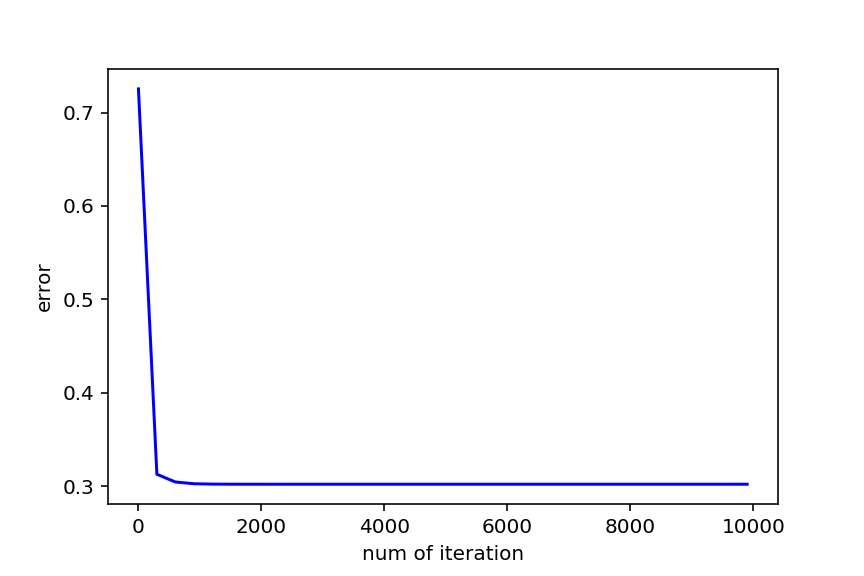

[]

In [17]:
fig,ax=plt.subplots(1,1)

ax.plot(list(range(1,10000,300)),errors,'b-')
ax.set_xlabel('num of iteration')
ax.set_ylabel('error')

plt.plot()

#### 3.2 Compare Data with Model

<IPython.core.display.Javascript object>


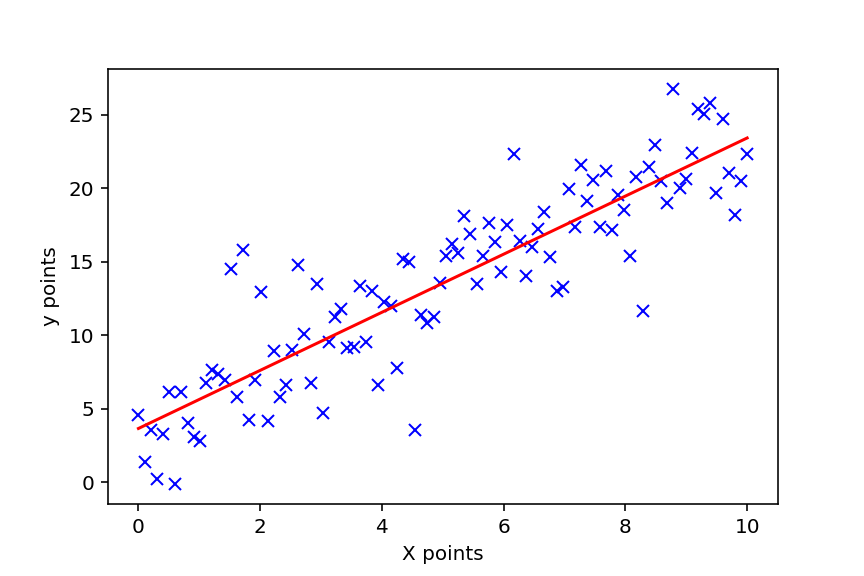

[]

In [18]:
fig,ax=plt.subplots(1,1)

ax.plot(x,y,'bx')
ax.plot(x,theta[0]*x+theta[1],'r-')
ax.set_xlabel('X points')
ax.set_ylabel('y points')

plt.plot()

### 4. Stochastic Gradient Descent

In [19]:
def stochastic_descent(x,y,theta,alpha,iteration=1000):
    iter_num=0;
    
    while iter_num<=iteration:
        for j in range(len(y)):
            for i in range(len(theta)):
                derivative=(y[j]-x[j].dot(theta))*x[j,i]
                theta[i]=theta[i]+alpha*derivative
        iter_num=iter_num+1
    return theta

In [20]:
theta=np.array([0,0],dtype=float)

stochastic_descent(x_train,y,theta,1e-3)

array([ 1.91710608,  3.80138851])

#### 4.1 Convergence test

In [21]:
errors=[]
for i in range(1,2000,300):
    theta=np.array([0,0],dtype=float)
    stochastic_descent(x_train,y,theta,1e-3,i)
    y_model=theta[0]*x+theta[1]
    error=np.sqrt(np.dot(y-y_model,y-y_model))/len(y)
    errors.append(error)

<IPython.core.display.Javascript object>


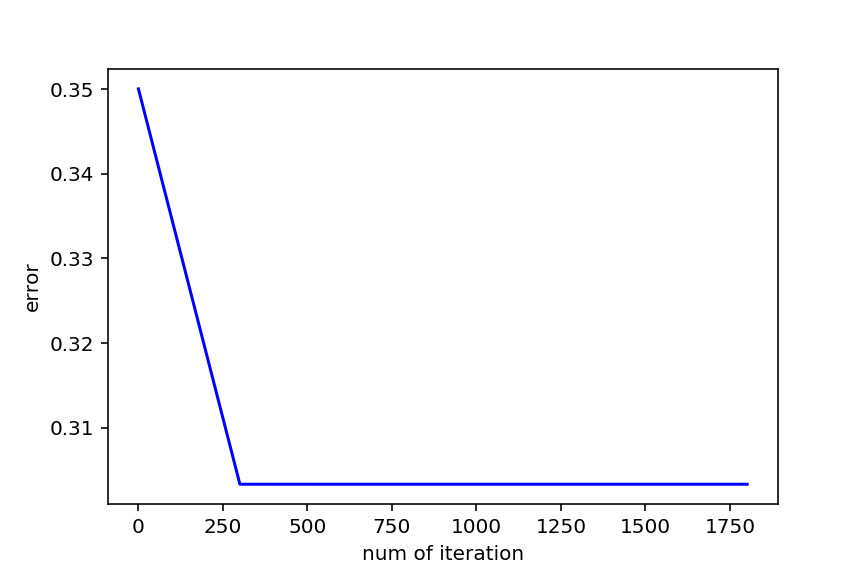

[]

In [22]:
fig,ax=plt.subplots(1,1)

ax.plot(list(range(1,2000,300)),errors,'b-')
ax.set_xlabel('num of iteration')
ax.set_ylabel('error')

plt.plot()

#### 3.2 Compare Data with Model

<IPython.core.display.Javascript object>


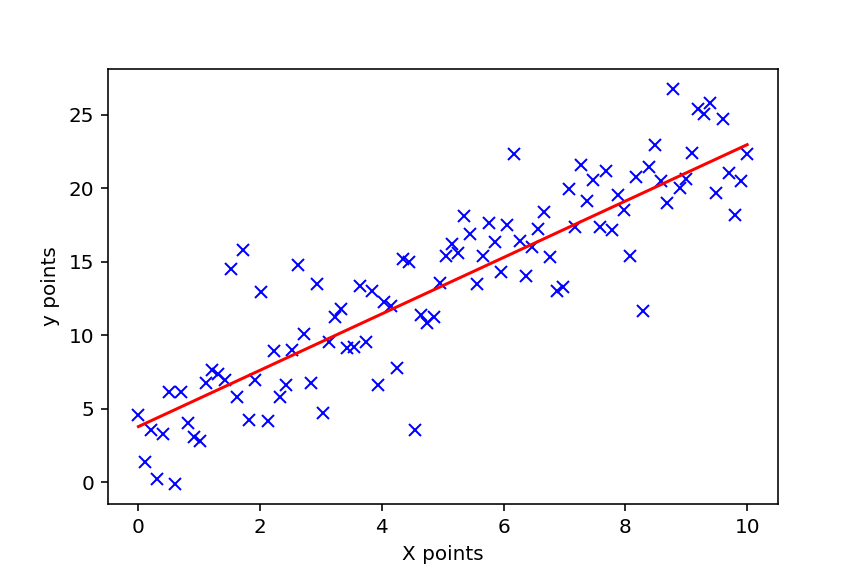

[]

In [23]:
fig,ax=plt.subplots(1,1)

ax.plot(x,y,'bx')
ax.plot(x,theta[0]*x+theta[1],'r-')
ax.set_xlabel('X points')
ax.set_ylabel('y points')

plt.plot()

### 5. Evaluate the model

In [24]:
import statsmodels.api as sm

First, we use the standard python package **statsmodels** for the linear regression model evaluation. The most important features are R-squared, Log-Likelihodd, AIC, BIC. Later, I will define equations to calculate these parameters

In [25]:
fit1=sm.OLS(y,x_train).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     355.7
Date:                Thu, 29 Jun 2017   Prob (F-statistic):           2.23e-34
Time:                        22:44:09   Log-Likelihood:                -252.54
No. Observations:                 100   AIC:                             509.1
Df Residuals:                      98   BIC:                             514.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9756      0.105     18.859      0.000         1.768     2.183
const          3.6723      0.606      6.057      0.000         2.469     4.876
==============================================================================
Omnibus:                        3.141   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.272
Skew:                           0.008   Prob(JB):                        0.195
Kurtosis:                       3.886   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5.1 The definition of $R^2$, AIC, BIC numbers

We first use the regression parameters given by the statsmodels, the $x_1$, $x_0$ are listed in the previous table

In [26]:
theta0=np.array([1.9756,3.6723],dtype=float)

In [27]:
## The variance of the dataset

def variance(x,y,coeff):
    ## number of obeservators
    nobr=y.shape[0]
    
    y_predict=coeff[0]*x+coeff[1]
    
    sigma2=np.dot(y-y_predict,y-y_predict)/float(nobr)
    return sigma2

var=variance(x,y,theta0)

if abs(var-fit1.ssr/len(y))<1e-5:
    print ("The result is the same as statsmodels!!")
else:
    print ("This is not the correct function!!")

The result is the same as statsmodels!!


##### 1. **$R^2$**

$R^2$ is defined as follows:

\begin{equation*}
R^2 = 1-\frac{SSR}{SST}
\end{equation*}

Some terminolgy:

$SSR$: sum of the squared residuals
$SSE$: the sum of the squared error, same as $SSR$
$SST$: the total sum of squares

They define as follows:
\begin{align}
SSE = SSR = \sum_{k=1}^N (y_i-\hat{y_i})^2 \\
SST = \sum_{k=1}^N (y_i-\bar{y})^2
\end{align}

In [28]:
def r_square(x,y,coeff):
    ssr=variance(x,y,coeff)*len(y)
    y_mean=y.mean()
    sst=np.dot(y-y_mean,y-y_mean)
    
    return 1-ssr/sst


r_squared=r_square(x,y,theta0)

if abs(r_squared-fit1.rsquared)<1e-5:
    print ("The result is the same as statsmodels!!")
else:
    print ("This is not the correct function!!")

The result is the same as statsmodels!!


Adjust $R^2$ is defined as follows:

\begin{equation*}
Adjust R^2 = 1-(1-R^2)\frac{N-1}{N-P-1}
\end{equation*}

$P = \textrm{The number of features}-1$

In [29]:
def adjr_square(x,y,coeff):
    p=coeff.shape[0]-1
    n=y.shape[0]
    
    res=1-(1-r_square(x,y,coeff))*((n-1)/(n-p-1))
    return res
    
adjr_squared=adjr_square(x,y,theta0)

if abs(adjr_squared-fit1.rsquared_adj)<1e-5:
    print ("The result is the same as statsmodels!!")
else:
    print ("This is not the correct function!!")

The result is the same as statsmodels!!


In [77]:
m=len(y)

log_likelihood=m*np.log(1/(np.sqrt(2*np.pi*sigma2)))-(1/sigma2)*0.5*np.dot((y-2.0529*x-2.4020),(y-2.0529*x-2.4020))

In [49]:
fit1.df_model

1.0

In [79]:
m*np.log(1/(np.sqrt(2*np.pi)*sigma2))

-302.80922814045101

In [80]:
4-2*log_likelihood

498.70308146091827

In [81]:
2*np.log(len(y))-2*log_likelihood

503.91342183289447